# Section 1: A 2x2 World

## 1. Forward and Backward Slash

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
colors = 'black white'.split()
cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)

### 1.1. Forward slash

[[0 1]
 [1 0]]


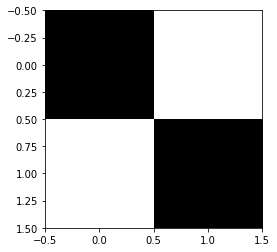

In [3]:
forward_slash = [[0,1],[1,0]]
forward_slash = np.array(forward_slash)
print(forward_slash)

plt.imshow(forward_slash,cmap=cmap);
plt.show()

### 1.2. Backward slash

[[1 0]
 [0 1]]


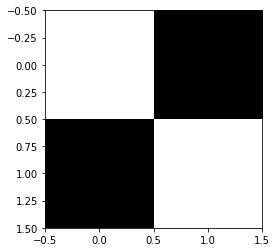

In [5]:
backward_slash = [[1,0],[0,1]]
backward_slash = np.array(backward_slash)
print(backward_slash)

plt.imshow(backward_slash,cmap=cmap);
plt.show()

## 2. How computer sees it ?

### 2.1. Forward Slash

[0 1 1 0]


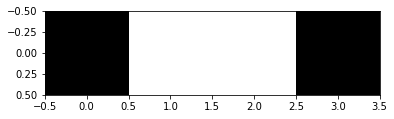

In [6]:
serialized_forward_slash = forward_slash.ravel()
print(serialized_forward_slash)

plt.imshow(np.expand_dims(serialized_forward_slash, axis=0),cmap=cmap );
plt.show()

### 2.2. Backward Slash

[1 0 0 1]


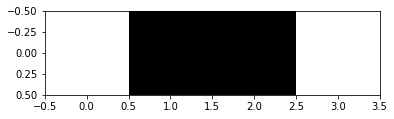

In [7]:
serialized_backward_slash = backward_slash.ravel()
print(serialized_backward_slash)

plt.imshow(np.expand_dims(serialized_backward_slash, axis=0),cmap=cmap);
plt.show()

## 3. Classify Forward and Backward Slash

In [8]:
def predict(image):
  rule = [ 1,-1,-1,1]
  
  processed_pixels = []
  for (i, pixel) in enumerate(image):
    processed_pixels.append(rule[i] * pixel)
  
  total = sum(processed_pixels)

  if total > 0:
    print("Prediciton: Backward Slash")    
  else:
    print("Predicition: Forward Slash")

  return total


In [9]:
images = [serialized_backward_slash,serialized_forward_slash]
for image in images:
  pred = predict(image)
  print(pred)

Prediciton: Backward Slash
2
Predicition: Forward Slash
-2


## 4. Generalization

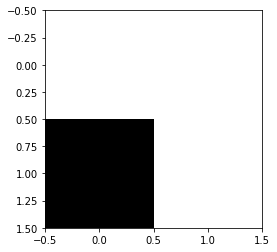

In [10]:
one = [[1,1],[0,1]]
one = np.array(one)

plt.imshow(one,cmap=cmap);
plt.show()

In [0]:
predict(one.ravel())

Prediciton: Backward Slash


1

[[0 0]
 [1 0]]


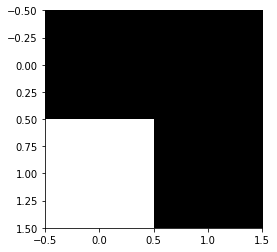

In [11]:
two = [[0,0],[1,0]]
two = np.array(two)
print(two)

plt.imshow(two,cmap=cmap);
plt.show()

In [12]:
predict(two.ravel())

Predicition: Forward Slash


-1

# Section 2: A 3x3 World

## 1 . Ex's & Oh's

In [13]:
POS = 1
NEG = -1

In [15]:
forward_slash = np.array([[POS,NEG,NEG],[NEG,POS,NEG],[NEG,NEG,POS]])
backward_slash = np.array([[NEG,NEG,POS],[NEG,POS,NEG],[POS,NEG,NEG]])

x = np.array([[POS,NEG,POS],[NEG,POS,NEG],[POS,NEG,POS]])
o = np.array([[NEG,POS,NEG],[POS,NEG,POS],[NEG,POS,NEG]])

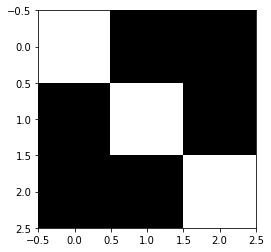

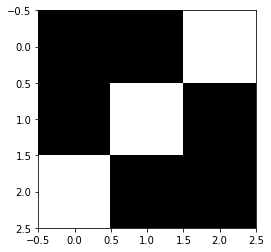

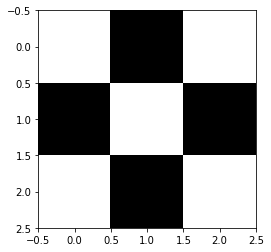

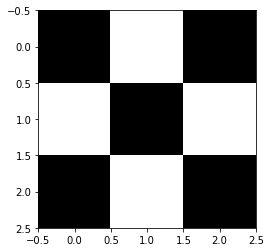

In [16]:
images = [forward_slash,backward_slash,x,o]
for image in images:
  plt.imshow(image,cmap=cmap);
  plt.show()

We break images into smaller images and analyse them

In [17]:
forward_slash_filter = [1,-1,-1,1]
backward_slash_fiter = [-1,1,1,-1]

In [18]:
forward_slash

array([[ 1, -1, -1],
       [-1,  1, -1],
       [-1, -1,  1]])

In [21]:
# first number: row or column index
# second number: axis (0 for row 1 for column)
filter_movement = [
                    ((2,1),(2,0)),
                    ((0,1),(2,0)),
                    ((0,0),(2,1)),
                    ((0,0),(0,1))
                  ]

In [22]:
def convulation_layer(layer_filter,image):
  filtered_image = []
  for movement in filter_movement:
    x_movement = movement[0]
    y_movement = movement[1]
    
    filtered_block  = np.delete(image, x_movement[0], axis=x_movement[1])
    filtered_block = np.delete(filtered_block,y_movement[0],y_movement[1])
    
    processed_pixels = []

    for (i, pixel) in enumerate(filtered_block.ravel()):
      processed_pixels.append(layer_filter[i] * pixel)

    total = sum(processed_pixels)
    filtered_image.append(total)

  filtered_image = np.array(filtered_image)
  return filtered_image

### 1.3. Searching for forward slash 

In [23]:
forward_slash_filter = [1,-1,-1,1]
convulation_layer(forward_slash_filter,forward_slash)

array([ 4, -2, -2,  4])

### 1.2. Searching for backward slash

In [24]:
backward_slash_filter = [-1,1,1,-1]
convulation_layer(backward_slash_filter,forward_slash)

array([-4,  2,  2, -4])

### 1.3. Combining results

In [25]:
def pooling_layer(filtered_image):
  pooled_image = []
  for pixel in filtered_image:
    if pixel > 2:
      pooled_image.append(1)
    else:
      pooled_image.append(-1)  
  return np.array(pooled_image)

In [26]:
filter_for_x = [1,-1,-1,1,-1,1,1,-1]
filter_for_o = [-1,1,1,-1,1,-1,-1,1]
filter_for_forward_slash = [-1,-1,-1,-1,-1,1,1,-1]
filter_for_backward_slash = [1,-1,-1,1,-1,-1,-1,-1]
filter_list = [filter_for_x,filter_for_o,filter_for_forward_slash,filter_for_backward_slash]

In [60]:
def predict(image):
    conv_1 = convulation_layer(forward_slash_filter,image)
    pool_1 = pooling_layer(conv_1)
    
    conv_2 = convulation_layer(backward_slash_filter,image)
    pool_2 = pooling_layer(conv_2)
    
    print(pool_1.reshape(2,2))
    print("")
    print(pool_2.reshape(2,2))
    
    merged_pool = pool_1.ravel() + pool_2.ravel()
    
    print(merged_pool)
    
    fc_layer = []
    for pixel in merged_pool:
        fc_layer.append(1 if 0 else -1) 
    
    for pixel in merged_pool:
        fc_layer.append(1 if -2 else -1) 
    
    fc_layer = np.array(fc_layer)
    
    processed_pixels = []
    pred = []
    
#     print(fc_layer.reshape(2,4))
    for layer_filter in filter_list: 
        for (i, pixel) in enumerate(fc_layer.ravel()):
            processed_pixels.append(layer_filter[i] * pixel)
        total = sum(processed_pixels)
        pred.append(total)
        
#     print(pred)


In [62]:
predict(x)

[[ 1 -1]
 [-1  1]]

[[-1  1]
 [ 1 -1]]
[0 0 0 0]


In [63]:
predict(o)

[[-1  1]
 [ 1 -1]]

[[ 1 -1]
 [-1  1]]
[0 0 0 0]


In [64]:
predict(forward_slash)

[[ 1 -1]
 [-1  1]]

[[-1 -1]
 [-1 -1]]
[ 0 -2 -2  0]
